## 雅可比法

In [2]:
import numpy as np
class calculate:
    def __init__(self):
        self.col = 0
        self.raw = 0

    def is_strictly_diagonally_dominant(self):
        matrix = self.orgin_matrix
        num_rows, num_cols = matrix.shape
        for i in range(num_rows):
            diagonal_element = abs(matrix[i, i])
            sum_of_off_diagonal = np.sum(np.abs(matrix[i, :])) - diagonal_element
            if diagonal_element <= sum_of_off_diagonal:
                return False
        return True

    def input(self, matrix1, matrix2: np.array):
        self.orgin_matrix = matrix1
        self.d = matrix2
        self.col = matrix1.shape[1]
        self.raw = matrix1.shape[0]
        if not self.is_strictly_diagonally_dominant():
            print("不是严格对角矩阵")
        else:
            print("是严格对角矩阵")

    def calculate_Jacobi(self, max_iterations=100, tolerance=1e-6):
        x = np.zeros(self.raw)  # 初始化解向量
        for iteration in range(max_iterations):
            x_new = np.zeros(self.raw)
            for i in range(self.raw):
                sum1 = np.dot(self.orgin_matrix[i, :i], x[:i])
                sum2 = np.dot(self.orgin_matrix[i, i + 1 :], x[i + 1 :])
                x_new[i] = (self.d[i] - sum1 - sum2) / self.orgin_matrix[i, i]

            norm_diff = np.max(np.abs(x_new - x))  # 计算无穷范数差
            if norm_diff < tolerance:
                print(iteration + 1, "轮次后收敛")
                return x_new

            x = x_new

        print(max_iterations, "轮次后仍然没有收敛")
        return x


J = calculate()

J.input(
    np.array([[5, 2, 1], [-1, 4, 2], [2, -3, 10]], dtype=float),
    np.array([-12, 20, 3], dtype=float),
)

solution = J.calculate_Jacobi(tolerance=1e-4)
print("Solution:", solution)

是严格对角矩阵
18 轮次后收敛
Solution: [-3.99999642  2.99997389  1.99999989]


## 高斯法

In [60]:
import numpy as np


class calculate:
    def __init__(self):
        self.col = 0
        self.raw = 0

    def is_strictly_diagonally_dominant(self):
        matrix = self.orgin_matrix
        num_rows, num_cols = matrix.shape
        for i in range(num_rows):
            diagonal_element = abs(matrix[i, i])
            sum_of_off_diagonal = np.sum(np.abs(matrix[i, :])) - diagonal_element
            if diagonal_element <= sum_of_off_diagonal:
                return False
        return True
    
    def input(self, matrix1, matrix2: np.array):
        self.orgin_matrix = matrix1
        self.d = matrix2
        self.col = matrix1.shape[1]
        self.raw = matrix1.shape[0]
        if not self.is_strictly_diagonally_dominant():
            print("不是严格对角矩阵")
        else:
            print("是严格对角矩阵")

    def calculate_GaussSeidel(self, max_iterations=100, tolerance=1e-6):
        x = np.zeros(self.raw)  # 初始化解向量
        for iteration in range(max_iterations):
            for i in range(self.raw):
                sum1 = np.dot(self.orgin_matrix[i, :i], x[:i])
                sum2 = np.dot(self.orgin_matrix[i, i + 1 :], x[i + 1 :])
                x[i] = (self.d[i] - sum1 - sum2) / self.orgin_matrix[i, i]

            residual = np.linalg.norm(np.dot(self.orgin_matrix, x) - self.d)  # 计算残差
            if residual < tolerance:
                print(iteration + 1, "轮次后收敛")
                return x

        print(max_iterations, "轮次后仍然没有收敛")
        return x


J = calculate()

J.input(
    np.array([[5, 2, 1], [-1, 4, 2], [2, -3, 10]], dtype=float),
    np.array([-12, 20, 3], dtype=float),
)

solution = J.calculate_GaussSeidel(tolerance=1e-4)
print("Solution:", solution)

是严格对角矩阵
9 轮次后收敛
Solution: [-3.99999355  3.00000082  1.99999896]


In [3]:
a = input()
a.replace("(",'').replace(")",'')

'masterpiece, night, dark, watermark, simple background, realistic, close-up, looking at viewer, 1girl, solo, cyborg, sitting, wariza, shy, blsuh, endured face, white bodysuit, white pantyhose, blue eyes, pink hair, water, [steam], hairclip, short hair, night, dark'

In [4]:
def lagrange_interpolation(x, y):
    n = len(x)
    coefficients = [0.0] * n

    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= 1 / (x[i] - x[j])
                coefficients[i] += term

    return coefficients

# 提供的数据点
x = [0, 1, 2, 4]
y = [1, 9, 23, 3]

# 计算插值多项式的系数
coefficients = lagrange_interpolation(x, y)

# 输出插值多项式的系数
for i, coef in enumerate(coefficients):
    print(f"a_{i} = {coef:.2f}")

# 输出插值多项式
print("插值多项式: ", end="")
for i in range(len(coefficients)):
    if i == 0:
        print(f"{coefficients[i]:.2f}", end=" + ")
    elif i == 1:
        print(f"{coefficients[i]:.2f}x", end=" + ")
    else:
        print(f"{coefficients[i]:.2f}x^{i}", end=" + ")
print("\n")


a_0 = -0.62
a_1 = 3.00
a_2 = 17.25
a_3 = 1.12
插值多项式: -0.62 + 3.00x + 17.25x^2 + 1.12x^3 + 



In [5]:
def newton_interpolation(x, y):
    n = len(x)
    coefficients = [y[0]]  # 存储插值多项式的系数，初始为插值点的y值

    for i in range(1, n):
        # 计算差商
        for j in range(n - 1, i - 1, -1):
            y[j] = (y[j] - y[j - 1]) / (x[j] - x[j - i])

        # 添加新的系数到列表中
        coefficients.append(y[n - i - 1])

    return coefficients

def format_newton_polynomial(coefficients, x_values):
    n = len(coefficients)
    result = f"{coefficients[0]:.2f}"

    for i in range(1, n):
        term = f"{coefficients[i]:+.2f}"

        for j in range(i):
            term += f"*(x - {x_values[j]:.2f})"
        
        result += term

    return result

# 提供的数据点
x = [0, 1, 2, 4]
y = [1, 9, 23, 3]

# 计算牛顿插值多项式的系数
coefficients = newton_interpolation(x, y)

# 输出牛顿插值多项式的系数
print("牛顿插值多项式的系数：", coefficients)

# 格式化输出牛顿插值多项式
x_values = x.copy()  # 用于格式化多项式的x值
newton_polynomial = format_newton_polynomial(coefficients, x_values)
print(f"牛顿插值多项式：P(x) = {newton_polynomial}\n")


牛顿插值多项式的系数： [1, 14.0, 8.0, 1]
牛顿插值多项式：P(x) = 1.00+14.00*(x - 0.00)+8.00*(x - 0.00)*(x - 1.00)+1.00*(x - 0.00)*(x - 1.00)*(x - 2.00)



In [6]:
import numpy as np

def cubic_spline_interpolation_1(x, y, deriv1_at_x0, deriv1_at_xn):
    n = len(x) - 1
    h = np.diff(x)
    
    # Calculate second derivatives
    delta = np.diff(y) / h
    delta2 = np.diff(delta) / h[:-1]
    
    # Calculate coefficients for the cubic spline
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)
    
    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        b[i] = 3 * (delta[i] / h[i] - delta[i-1] / h[i-1])
    
    # Set boundary conditions (first derivative)
    A[0, 0] = 2 * h[0]
    A[0, 1] = h[0]
    b[0] = 3 * (delta[0] / h[0] - deriv1_at_x0)
    
    A[n, n-1] = h[n-1]
    A[n, n] = 2 * h[n-1]
    b[n] = 3 * (deriv1_at_xn - delta[n-1] / h[n-1])
    
    # Solve for the second derivatives
    second_derivatives = np.linalg.solve(A, b)
    
    # Calculate cubic spline coefficients
    a = y[:-1]
    b = delta - h * (2 * second_derivatives[:-1] + second_derivatives[1:]) / 3
    c = (second_derivatives[:-1] - second_derivatives[1:]) / (3 * h)
    d = (b[1:] - b[:-1]) / h
    
    coefficients = np.array([a, b, c, d])
    
    return coefficients

def cubic_spline_eval(x, x_i, coefficients):
    a, b, c, d = coefficients
    idx = np.searchsorted(x_i, x)
    idx = np.clip(idx, 1, len(x_i) - 1)
    x_delta = x - x_i[idx-1]
    y_val = a[idx-1] + b[idx-1] * x_delta + c[idx-1] * x_delta**2 + d[idx-1] * x_delta**3
    return y_val

# Example usage
x = np.array([0,1,2,3])  # X coordinates
y = np.array([0,0.5,2.0,1.5])  # Y coordinates
deriv1_at_x0 = 0.2         # First derivative at x[0]
deriv1_at_xn = -1.0        # First derivative at x[n]

coefficients = cubic_spline_interpolation_1(x, y, deriv1_at_x0, deriv1_at_xn)

# Print coefficients of the cubic spline function
for i in range(len(coefficients[0])):
    a = coefficients[3][i]
    b = coefficients[2][i]
    c = coefficients[1][i]
    d = coefficients[0][i]
    print(f"Cubic Spline Segment {i + 1}: {a}x^3 + {b}x^2 + {c}x + {d}")

# Evaluate the spline at a specific x value
x_val = 2.5
y_val = cubic_spline_eval(x_val, x, coefficients)
print(f"Spline value at x={x_val} is {y_val}")


ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [16]:
def 第一边界条件差值(x_i, y_i, condition_left,condition_right):
    # 若满足第一边界条件,进行样条插值
    x_i = np.array([1, 1.4, 2.6, 3])
    y_i = np.array([0.2, 1.8, 3.4, 3.2])

    h_i = x_i[1:] - x_i[0:-1]
    nmt_i = h_i[1:] / (h_i[1:] + h_i[0:-1])
    miu_i = 1 - nmt_i
    # h_i[1:]
    d_i = 3 * miu_i * ((y_i[2:] - y_i[1:-1]) / h_i[1:]) + 3 * nmt_i * (
        (y_i[1:-1] - y_i[0:-2]) / h_i[0:-1]
    )
    # 请补全代码和注释

第一边界条件差值()

array([10.   , -0.125])

In [18]:
# 三次样条差值,第一边界条件
x_i = np.array([0, 1, 2, 3])
y_i = np.array([0, 0.5, 2.0, 1.5])

df_0 = 0.2
df_n = -1.0

h_i = x_i[1:] - x_i[0:-1]
lambda_i = h_i[1:] / (h_i[1:] + h_i[0:-1])
miu_i = 1 - lambda_i
# h_i[1:]
d_i = 3 * miu_i * ((y_i[2:] - y_i[1:-1]) / h_i[1:]) + 3 * lambda_i * (
    (y_i[1:-1] - y_i[0:-2]) / h_i[0:-1]
)
# 请补全代码和注释,用列主元高斯消去法进行计算

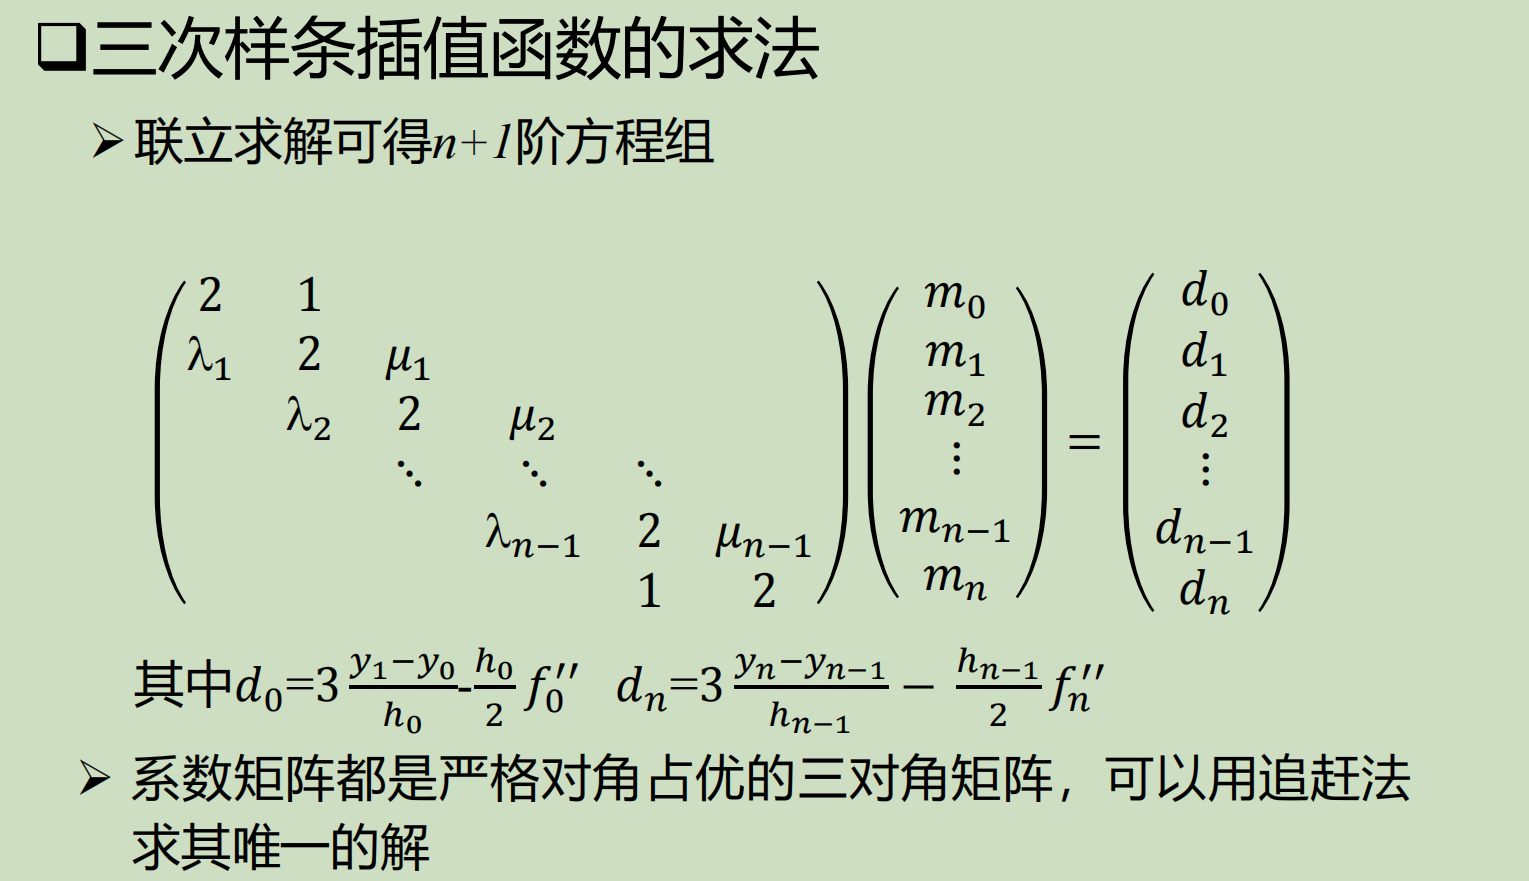
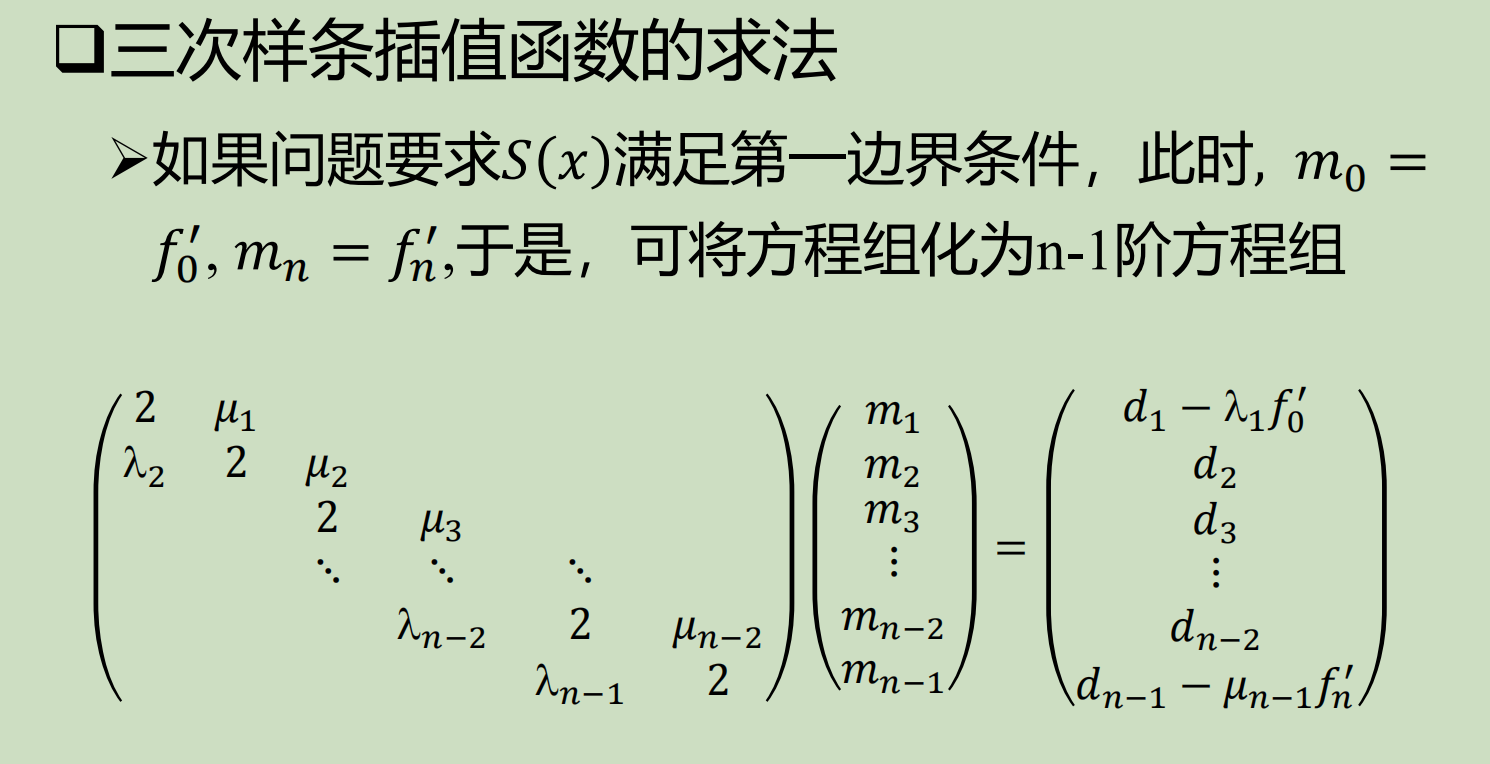

In [42]:
import numpy as np

def gauss_elimination(A, b):
    n = len(b)
    x = np.zeros(n)

    for i in range(n):
        # 找到主元的行
        max_row = i
        for j in range(i + 1, n):
            if abs(A[j, i]) > abs(A[max_row, i]):
                max_row = j

        # 交换当前行和主元行
        A[[i, max_row]] = A[[max_row, i]]
        b[i], b[max_row] = b[max_row], b[i]

        # 将当前列下方的元素消去
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            b[j] -= factor * b[i]
            A[j, i:] -= factor * A[i, i:]

    # 回代求解
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i + 1 :], x[i + 1 :])) / A[i, i]

    return x


def cubic_spline_interpolation_1(x_i, y_i, df_0, df_n):
    h_i = x_i[1:] - x_i[0:-1]
    lambda_i = h_i[1:] / (h_i[1:] + h_i[0:-1])
    miu_i = 1 - lambda_i

    d_i = 3 * miu_i * ((y_i[2:] - y_i[1:-1]) / h_i[1:]) + 3 * lambda_i * (
        (y_i[1:-1] - y_i[0:-2]) / h_i[0:-1]
    )

    b = d_i.copy()
    n = len(x_i) - 1

    A = np.zeros((n - 1, n - 1))

    b[0] -= df_0 * lambda_i[0]
    b[-1] -= df_n * miu_i[-1]

    for i in range(0, n - 1):
        A[i, i] = 2
        A[i, i - 1] = lambda_i[i - 1]
        A[i - 1, i] = miu_i[i - 1]

    coefficients = gauss_elimination(A, b)

    return coefficients


def cubic_spline_interpolation_2(x_i, y_i, ddf_0, ddf_n):
    h_i = (x_i[1:] - x_i[0:-1]) * 1.0
    lambda_i = h_i[1:] / (h_i[1:] + h_i[0:-1])
    miu_i = 1 - lambda_i

    d_i = 3 * miu_i * ((y_i[2:] - y_i[1:-1]) / h_i[1:]) + 3 * lambda_i * (
        (y_i[1:-1] - y_i[0:-2]) / h_i[0:-1]
    )

    b = np.zeros_like([0 for i in range(d_i.size + 2)]) * 1.0

    b[1:-1] = d_i
    n = len(x_i) - 1

    A = np.zeros((n + 1, n + 1))

    b[0] = 3 * (y_i[1] - y_i[0]) / h_i[0] - h_i[0] * ddf_0 / 2
    b[-1] = 3 * (y_i[n] - y_i[n - 1]) / h_i[n - 1] - h_i[n - 1] * ddf_n / 2

    for i in range(0, n + 1):
        A[i, i] = 2
        if i > 0 and i < n:
            A[i, i + 1] = lambda_i[i - 1]
        if i < n - 1:
            A[i + 1, i] = miu_i[i]
    A[0, 1] = A[-1, -2] = 1

    coefficients = gauss_elimination(A, b)

    return coefficients

x_i = np.array([0, 1, 2, 3])
y_i = np.array([0, 0.5, 2.0, 1.5])
df_0 = 0.2
df_n = -1
ddf_0 = -0.3
ddf_n = 3.3

coefficients = cubic_spline_interpolation_1(x_i, y_i, df_0, df_n)
print("使用第一边界条件求解:")
print(f"m_0: {df_0}")
for i, coef in enumerate(coefficients):
    print(f"m_{i+1}: {coef}")
print(f"m_{x_i.size-1}: {df_n}")

coefficients = cubic_spline_interpolation_2(x_i, y_i, ddf_0, ddf_n)
print("使用第二边界条件求解:")
for i, coef in enumerate(coefficients):
    print(f"m_{i}: {coef}")

使用第一边界条件求解:
m_0: 0.2
m_1: 1.28
m_2: 0.6799999999999999
m_3: -1
使用第二边界条件求解:
m_0: 0.22333333333333327
m_1: 1.2033333333333334
m_2: 0.9633333333333333
m_3: -2.0566666666666666


In [29]:

coefficients

[[2.  1.  0.  0. ]
 [0.5 2.  0.5 0. ]
 [0.  0.5 2.  0.5]
 [0.  0.  1.  2. ]]


array([ 0.62333333,  0.80666667,  1.52666667, -1.95666667])

In [36]:
for i in range(0, 5):
    print(i)

0
1
2
3
4
